In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv(r'C:\Users\Data\Advertising.csv\Advertising.csv', index_col=0)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('Sales', axis =1)
y = df['Sales']

------
## Preprocessing PolynomialFeatures

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._polynomial:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Read more in the :ref:`User Guide <polynomial_features>`.
 |  
 |  Parameters
 |  ----------
 |  degree : int or tuple (min_degree, max_degree), default=2
 |      If a single int is given, it specifies the maximal degree of the
 |      polynomial features. If a tuple `(min_degree, max_degree)` is passed,
 |      then `min_degree` is the minimum and `max_degree` is the maximum
 |

In [7]:
polynomial_convert = PolynomialFeatures(degree=2, include_bias = False)

In [8]:
polynomial_convert

PolynomialFeatures(include_bias=False)

In [9]:
polyfeatures = polynomial_convert.fit_transform(X)

In [10]:
polyfeatures.shape 

(200, 9)

In [11]:
polyfeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
polyfeatures[0][:3]

array([230.1,  37.8,  69.2])

---
## Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size= 0.3, random_state= 101)

## Create Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#help(LinearRegression)

In [17]:
model = LinearRegression(fit_intercept=True)

---
## Training model

In [18]:
model.fit(X_train, y_train)

LinearRegression()

## Prediction

In [19]:
test_prediction = model.predict(X_test)

In [20]:
test_prediction

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

---
## Metrics Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

In [23]:
MAE

0.4896798044803558

In [24]:
MSE

0.44175055104033756

In [25]:
RMSE

0.664643175726899

In [26]:
df['Sales'].mean()

14.022500000000003

---
## Choosing the model

In [27]:

train_rmse_error = [] # Training error per degree
test_rmse_error = [] # test error per degree

for degree in range(1, 10):
    
    polynomial_converter = PolynomialFeatures(degree = degree, include_bias=False)
    polyfeatures = polynomial_converter.fit_transform(X)
    
    # split 
    X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size = 0.3, random_state= 42)
    
    # train model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    # prediction
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # calculate error
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # append error
    train_rmse_error.append(train_RMSE)
    test_rmse_error.append(test_RMSE)
    


In [28]:
train_rmse_error

[1.5745968305905438,
 0.5950712355838924,
 0.46887581118220867,
 0.3694689701771557,
 0.24382207498099467,
 0.19730909268503127,
 0.5474862979604246,
 0.167997950875381,
 0.15887147240223293]

In [29]:
test_rmse_error

[1.9485372043446383,
 0.7233218473857542,
 0.5392350985650703,
 1.3032265586817728,
 5.946740659488152,
 25.029336579284532,
 688.3866339553578,
 3523.720530930248,
 147140.88786030587]

In [30]:
plt.style.use(['science','notebook','grid'])

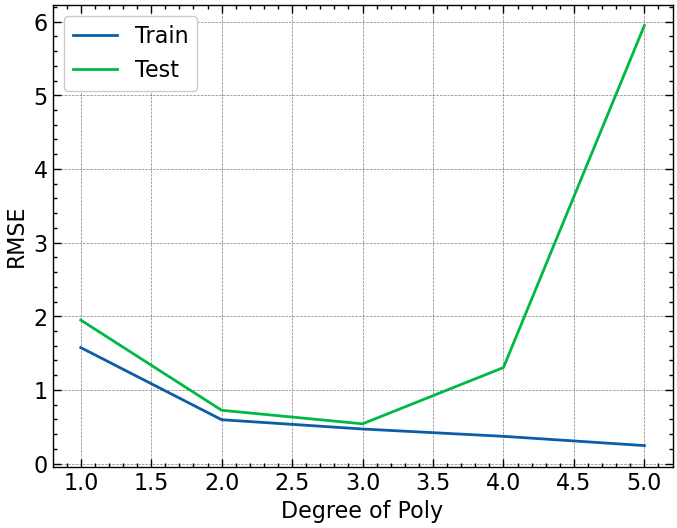

In [31]:
plt.plot(range(1, 6), train_rmse_error[:5], label='Train')
plt.plot(range(1, 6), test_rmse_error[:5], label='Test')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

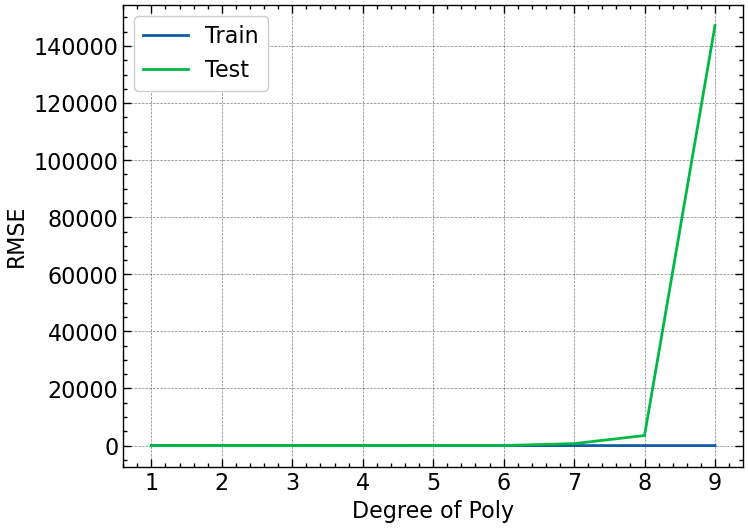

In [32]:
plt.plot(range(1, 10), train_rmse_error, label='Train')
plt.plot(range(1, 10), test_rmse_error, label='Test')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

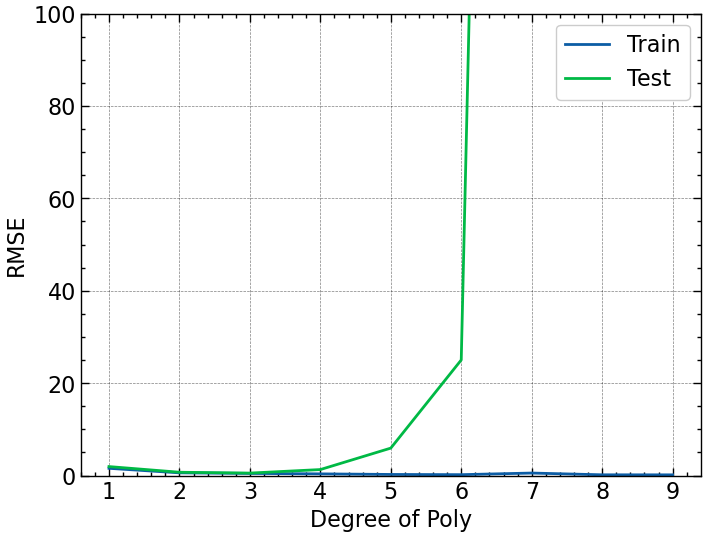

In [33]:
plt.plot(range(1, 10), train_rmse_error, label='Train')
plt.plot(range(1, 10), test_rmse_error, label='Test')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.ylim(0,100)

plt.legend();

----
### Dari hasil ploting dapat di simpulkan nilai terbaiknya degree 4 namun untuk agar biar lebih aman maka menggunakan degree 3
----

## Final Processing PolynomialFeatures

In [34]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias = False)

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

## Saving and Converter Model

In [37]:
from joblib import dump, load

In [38]:
dump(final_model,'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [39]:
dump(final_poly_converter, 'poly_converter.joblib')

['poly_converter.joblib']

## Deploy and Predictions

In [40]:
loaded_model = load('sales_poly_model.joblib')
loaded_poly = load('poly_converter.joblib')

In [41]:
iklan = [[149,22,12]]

In [42]:
iklan_poly = loaded_poly.transform(iklan)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [43]:
iklan_poly 

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [44]:
final_model.predict(iklan_poly)

array([14.64501014])